In [60]:
import numpy as np
import pandas as pd
import keras
from keras import layers
from matplotlib import pyplot as plt

In [108]:
df_th = pd.read_csv('../time_series.csv')
df_th.head()
df_th.drop(columns=["Unnamed: 0"], inplace=True)
df_th

,T,H,Time
0,26.0,39.0,2
1,26.0,39.0,3
2,26.0,39.0,4
3,26.0,39.0,5
4,26.0,39.0,6
...,...,...,...
4995,26.0,38.0,5149
4996,26.0,38.0,5150
4997,26.0,38.0,5151
4998,26.0,38.0,5152


In [171]:
df_tha = pd.read_csv('../anom_time_series_try2.csv')
df_tha.head()
df_tha.drop(columns=["Unnamed: 0"], inplace=True)
df_tha

,T,H,Time
0,26.0,37.0,2
1,26.0,37.0,3
2,26.0,37.0,4
3,26.0,37.0,5
4,26.0,37.0,6
...,...,...,...
495,25.0,39.0,512
496,25.0,39.0,513
497,25.0,39.0,514
498,25.0,39.0,515


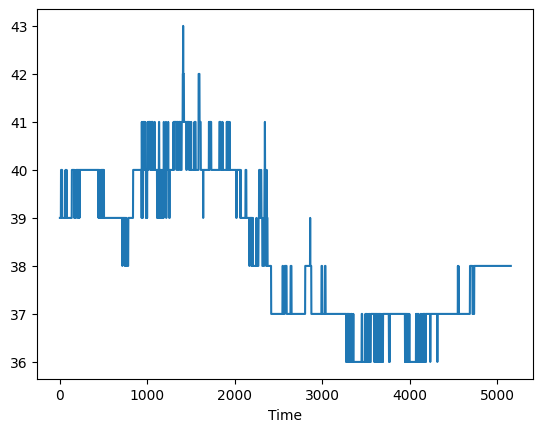

In [172]:
fig, ax = plt.subplots()
df_th.plot(legend=False, ax=ax, x = "Time", y = "H")
plt.show()

In [173]:
t_mean_train = df_th["T"].mean()
t_std_train = df_th["T"].std()
df_th["T_standardscaled"] = (df_th["T"] - t_mean_train) / t_std_train #standard scaling the training set

h_mean_train = df_th["H"].mean()
h_std_train = df_th["H"].std()
df_th["H_standardscaled"] = (df_th["H"] - h_mean_train) / h_std_train #standard scaling the training set

df_th

,T,H,Time,T_standardscaled,H_standardscaled
0,26.0,39.0,2,-0.654444,0.469262
1,26.0,39.0,3,-0.654444,0.469262
2,26.0,39.0,4,-0.654444,0.469262
3,26.0,39.0,5,-0.654444,0.469262
4,26.0,39.0,6,-0.654444,0.469262
...,...,...,...,...,...
4995,26.0,38.0,5149,-0.654444,-0.193912
4996,26.0,38.0,5150,-0.654444,-0.193912
4997,26.0,38.0,5151,-0.654444,-0.193912
4998,26.0,38.0,5152,-0.654444,-0.193912


In [174]:
# t_mean_train = df_tha["T"].mean()
# t_std_train = df_tha["T"].std()
df_tha["T_standardscaled"] = (df_tha["T"] - t_mean_train) / t_std_train #standard scaling the training set

# h_mean = df_tha["H"].mean()
# h_std = df_tha["H"].std()
df_tha["H_standardscaled"] = (df_tha["H"] - h_mean_train) / h_std_train #standard scaling the training set

df_tha

,T,H,Time,T_standardscaled,H_standardscaled
0,26.0,37.0,2,-0.654444,-0.857087
1,26.0,37.0,3,-0.654444,-0.857087
2,26.0,37.0,4,-0.654444,-0.857087
3,26.0,37.0,5,-0.654444,-0.857087
4,26.0,37.0,6,-0.654444,-0.857087
...,...,...,...,...,...
495,25.0,39.0,512,-2.249094,0.469262
496,25.0,39.0,513,-2.249094,0.469262
497,25.0,39.0,514,-2.249094,0.469262
498,25.0,39.0,515,-2.249094,0.469262


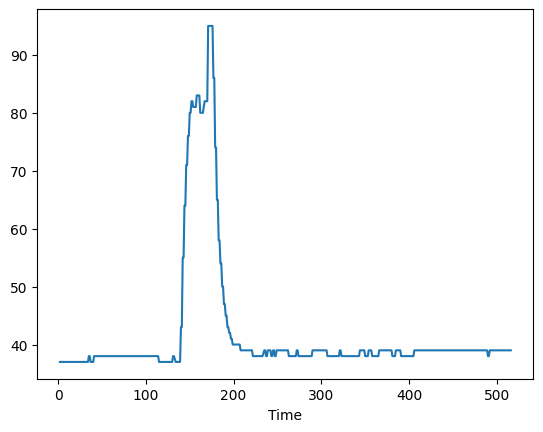

In [175]:
fig, ax = plt.subplots()
df_tha.plot(legend=False, ax=ax, x = "Time", y = "H")
plt.show()

In [176]:
print("Number of training samples:", len(df_th))

Number of training samples: 5000


In [177]:
df_th

,T,H,Time,T_standardscaled,H_standardscaled
0,26.0,39.0,2,-0.654444,0.469262
1,26.0,39.0,3,-0.654444,0.469262
2,26.0,39.0,4,-0.654444,0.469262
3,26.0,39.0,5,-0.654444,0.469262
4,26.0,39.0,6,-0.654444,0.469262
...,...,...,...,...,...
4995,26.0,38.0,5149,-0.654444,-0.193912
4996,26.0,38.0,5150,-0.654444,-0.193912
4997,26.0,38.0,5151,-0.654444,-0.193912
4998,26.0,38.0,5152,-0.654444,-0.193912


In [178]:
#running model only on humidity
df_train = df_th[["H_standardscaled"]]

In [179]:
df_train    

,H_standardscaled
0,0.469262
1,0.469262
2,0.469262
3,0.469262
4,0.469262
...,...
4995,-0.193912
4996,-0.193912
4997,-0.193912
4998,-0.193912


In [180]:
df_test = df_tha[["H_standardscaled"]]
df_test

,H_standardscaled
0,-0.857087
1,-0.857087
2,-0.857087
3,-0.857087
4,-0.857087
...,...
495,0.469262
496,0.469262
497,0.469262
498,0.469262


In [181]:
TIME_STEPS = 100
# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_train.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (4901, 100, 1)


In [182]:
x_train

array([[[ 0.46926245],
        [ 0.46926245],
        [ 0.46926245],
        ...,
        [ 0.46926245],
        [ 0.46926245],
        [ 0.46926245]],

       [[ 0.46926245],
        [ 0.46926245],
        [ 0.46926245],
        ...,
        [ 0.46926245],
        [ 0.46926245],
        [ 0.46926245]],

       [[ 0.46926245],
        [ 0.46926245],
        [ 0.46926245],
        ...,
        [ 0.46926245],
        [ 0.46926245],
        [ 0.46926245]],

       ...,

       [[-0.19391229],
        [-0.19391229],
        [-0.19391229],
        ...,
        [-0.19391229],
        [-0.19391229],
        [-0.19391229]],

       [[-0.19391229],
        [-0.19391229],
        [-0.19391229],
        ...,
        [-0.19391229],
        [-0.19391229],
        [-0.19391229]],

       [[-0.19391229],
        [-0.19391229],
        [-0.19391229],
        ...,
        [-0.19391229],
        [-0.19391229],
        [-0.19391229]]])

In [183]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32,
            kernel_size=7,
            padding="same",
            strides=1,
            activation="relu",
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16,
            kernel_size=7,
            padding="same",
            strides=2,
            activation="relu",
        ),
        layers.Conv1DTranspose(
            filters=16,
            kernel_size=7,
            padding="same",
            strides=2,
            activation="relu",
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32,
            kernel_size=7,
            padding="same",
            strides=1,
            activation="relu",
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same")
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_34 (Conv1D)              │ (None, 100, 32)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 100, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_35 (Conv1D)              │ (None, 50, 16)         │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_51             │ (None, 100, 16)        │         1,808 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 100, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_52             │ (None, 100, 32)        │         3,616 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_53             │ (None, 100, 1)         │           225 │
│ (Conv1DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,505 (37.13 KB)

 Trainable params: 9,505 (37.13 KB)

 Non-trainable params: 0 (0.00 B)

In [184]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=250,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.8451 - val_loss: 0.0659
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1268 - val_loss: 0.0182
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0686 - val_loss: 0.0185
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0597 - val_loss: 0.0180
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0542 - val_loss: 0.0159
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0486 - val_loss: 0.0123
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0426 - val_loss: 0.0092
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0370 - val_loss: 0.0073
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0338 - val_loss: 0.0059
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0299 - val_loss: 0.0050
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0274 - val_loss: 0.0039
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0257 - val_l

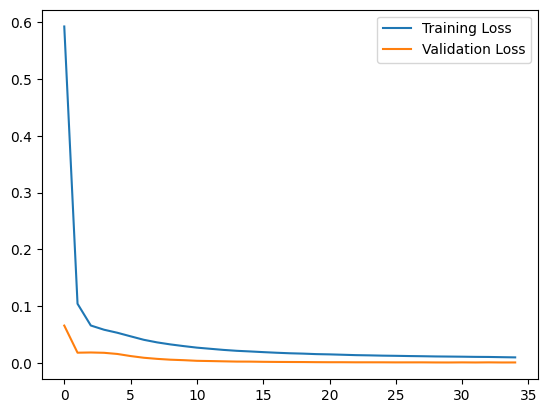

In [185]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


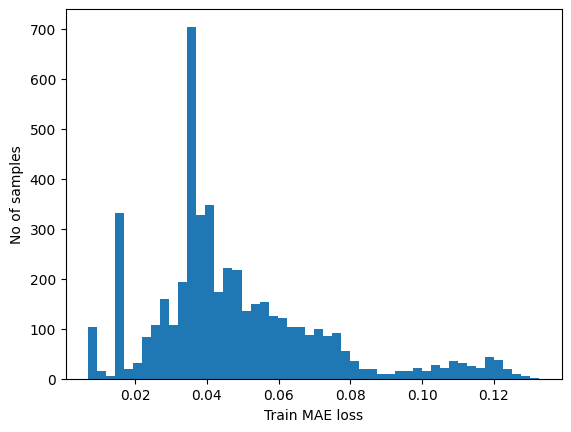

Reconstruction error threshold:  0.13260769414216894


In [186]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

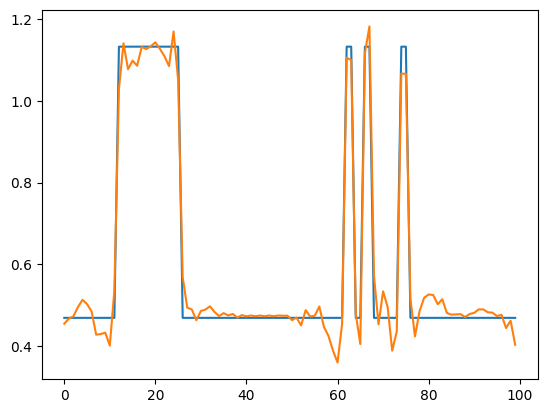

In [187]:
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

In [188]:
x_test = create_sequences(df_test.values)
print("Test input shape: ", x_test.shape)

Test input shape:  (401, 100, 1)


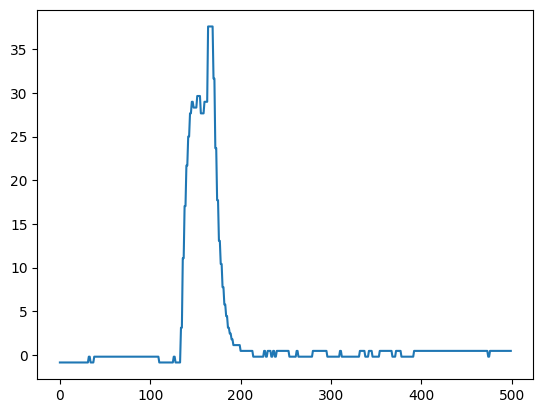

Test input shape:  (401, 100, 1)
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


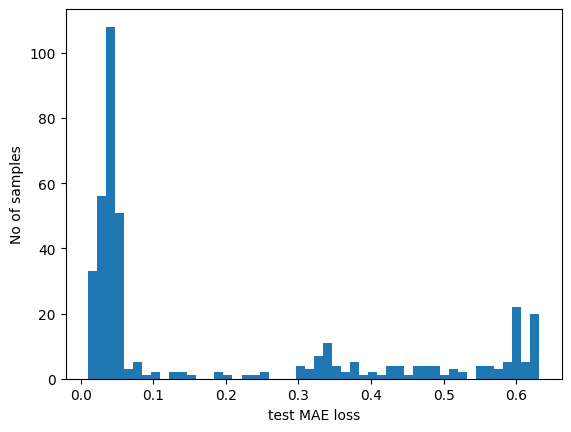

Number of anomaly samples:  140
Indices of anomaly samples:  (array([ 37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 177], dtype=int64),)


In [189]:
fig, ax = plt.subplots()
df_test.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

In [190]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test) - TIME_STEPS + 1):
    print(data_idx)
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
3

In [191]:
len(df_test)

500

In [192]:
anomaly_loc = np.where(anomalies)
anomaly_loc

(array([ 37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
         50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
         63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
         76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
         89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
        102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
        115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
        128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
        167, 168, 169, 170, 171, 172, 173, 174, 175, 177], dtype=int64),)

In [193]:
df_subset = df_test.iloc[anomaly_loc]

In [194]:
df_subset

,H_standardscaled
37,-0.857087
38,-0.193912
39,-0.193912
40,-0.193912
41,-0.193912
...,...
172,23.680378
173,23.680378
174,17.711806
175,17.711806


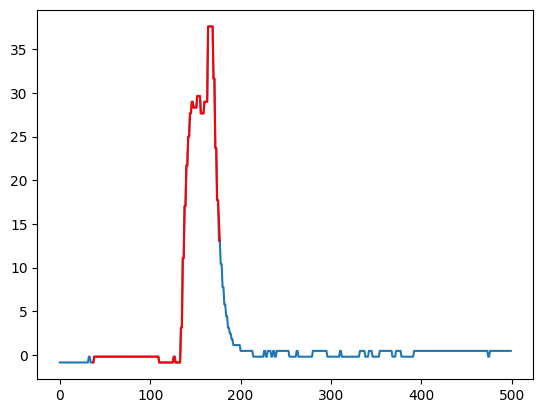

In [195]:
fig, ax = plt.subplots()
df_test.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()